In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Datasets/Processed.csv")

In [3]:
corr_matrix = df.corr()
corr_matrix["max_temp"].sort_values(ascending=False)

max_temp     1.000000
max_1        0.903494
max_2        0.858019
max_3        0.839023
max_4        0.820886
max_5        0.808487
min_temp     0.777798
min_1        0.774965
min_2        0.773575
min_3        0.768552
min_4        0.763908
min_5        0.755552
day         -0.020711
month       -0.031606
year        -0.096786
diff_temp   -0.120329
diff_1      -0.222583
diff_2      -0.272676
diff_3      -0.285405
diff_4      -0.296712
diff_5      -0.296880
Name: max_temp, dtype: float64

In [4]:
x = df.drop(["min_temp", "day", "month", "year", "max_temp", "diff_temp", "diff_1", "diff_2", "diff_3", "diff_4", "diff_5"], axis=1)

In [5]:
x.columns

Index(['max_1', 'max_2', 'max_3', 'max_4', 'max_5', 'min_1', 'min_2', 'min_3',
       'min_4', 'min_5'],
      dtype='object')

In [6]:
y  = df["max_temp"]

In [7]:
x.shape

(3357, 10)

In [8]:
x_train, x_test , y_train, y_test = x[:3000], x[3000:], y[:3000].to_numpy().ravel(), y[3000:].to_numpy().ravel()

In [9]:
from linear_regression  import linearRegression
lin_reg = linearRegression(learning_rate=0.0001)
w,b,l = lin_reg.fit(x_train, y_train)

Loss: 3.3577069971764044


In [10]:
import matplotlib.pyplot as plt

In [11]:
pred = lin_reg.predict(x_test)

In [12]:
rms = np.sqrt(np.mean((pred-y_test)**2))
rms

6.9217468042506916

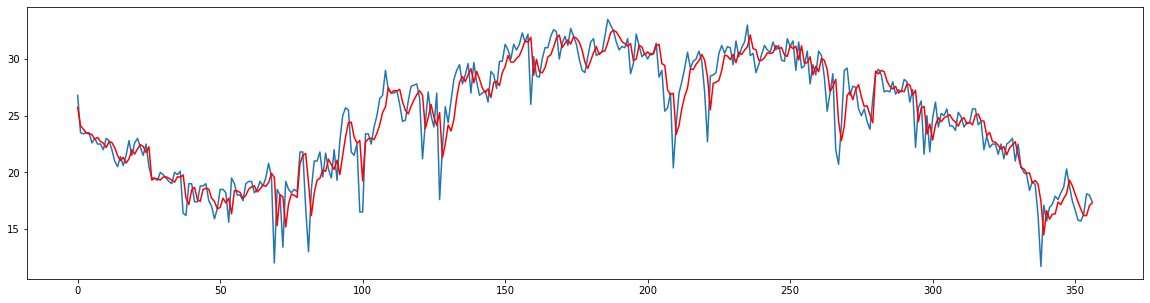

In [13]:
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(pred, "r")

In [14]:
comp = pd.DataFrame({"Actual": y_test.ravel(), "pred": pred.ravel()})
comp

,Actual,pred
0,26.8,25.733074
1,23.5,24.112170
2,23.4,23.814621
3,23.5,23.480473
4,23.5,23.396793
...,...,...
352,15.7,16.754035
353,16.3,16.187391
354,18.1,16.187583
355,18.0,17.060149


In [15]:
print(f"w: {w.shape}, b : {b}")

w: (10, 1), b : 0.03278095255956295


In [16]:
value =[25,24,24,23,23,11,14,13,11,10]
len(value)

10

In [17]:
pred = lin_reg.predict(value)
pred

array([24.49255189])